In [1]:
!ls ~/exp_builds/astera.exp/rundata/run1/locals.csv

/home/cls0027/exp_builds/astera.exp/rundata/run1/locals.csv


In [2]:
import astlib
from pathlib import Path
import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

funcs_df = pd.read_csv(Path.home()/'exp_builds/astera.exp/rundata/run1/functions.csv')
locals_df = pd.read_csv(Path.home()/'exp_builds/astera.exp/rundata/run1/locals.csv')
locals_df

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,TypeJson_Debug,LeafCategory,LeafSigned,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId
0,1084201,"17,29,53,79,79,87",local_c,int32,stack,NaN,-12,BUILTIN,int32,i,...,"{""kind"": ""Builti...",BUILTIN,True,False,4,LLL,L,L,L,0
1,1084294,"12,24,44,69,69,77",local_c,int32,stack,NaN,-12,BUILTIN,int32,i,...,"{""kind"": ""Builti...",BUILTIN,True,False,4,LLL,L,L,L,0
2,1084377,"74,106",uVar1,uint32,register,eax,0,BUILTIN,uint32,NaN,...,NaN,COMP,False,False,0,LLL,L,L,L,0
3,1084377,"27,64,89",lVar2,int64,register,rax,0,BUILTIN,int64,asset,...,"{""kind"": ""Pointe...",STRUCT,False,False,0,PLL,P,L,L,0
4,1084377,"43,56,101",lVar3,int64,register,rax,0,BUILTIN,int64,asset_00,...,"{""kind"": ""Pointe...",STRUCT,False,False,0,PLL,P,L,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31134,1066231,57,in_AL,char,register,al,0,BUILTIN,char,in_AL,...,"{""kind"": ""Builti...",BUILTIN,True,False,1,LLL,L,L,L,8
31135,1066231,"263,275,335,367",__stream,FILE*,register,rax,0,PTR,"PTR,STRUCT",__stream,...,"{""kind"": ""Pointe...",STRUCT,False,False,0,PLL,P,L,L,8
31136,1066231,"111,206,340",local_d8,uint32,stack,NaN,-216,BUILTIN,uint32,NaN,...,NaN,COMP,False,False,0,LLL,L,L,L,8
31137,1066231,121,local_d4,uint32,stack,NaN,-212,BUILTIN,uint32,NaN,...,NaN,COMP,False,False,0,LLL,L,L,L,8


In [3]:
func_row = funcs_df.iloc[4]
ast_file = func_row.AstJson_Strip

ast = astlib.read_json(ast_file)
ast

In [4]:
locals_df[locals_df.FunctionStart==func_row.FunctionStart]

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,TypeJson_Debug,LeafCategory,LeafSigned,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId
6,1084537,"24,29,70,75",fVar1,float,unique,NaN,21632,BUILTIN,float,fVar1,...,"{""kind"": ""Builti...",BUILTIN,True,True,4,LLL,L,L,L,0
7,1084537,"38,43,84,89,172,198",iVar2,int32,register,eax,0,BUILTIN,int32,iVar2,...,"{""kind"": ""Builti...",BUILTIN,True,False,4,LLL,L,L,L,0
8,1084537,"190,212",iVar3,int32,register,eax,0,BUILTIN,int32,iVar3,...,"{""kind"": ""Builti...",BUILTIN,True,False,4,LLL,L,L,L,0
9,1084537,"52,57",dVar4,double,register,xmm0_qa,4608,BUILTIN,double,dVar4,...,"{""kind"": ""Builti...",BUILTIN,True,True,8,LLL,L,L,L,0
10,1084537,"98,103",dVar5,double,register,xmm0_qa,4608,BUILTIN,double,dVar5,...,"{""kind"": ""Builti...",BUILTIN,True,True,8,LLL,L,L,L,0


In [5]:
from datatype_recovery.models.dataset import VariableGraphBuilder, VariableGraphViewer

builder = VariableGraphBuilder('iVar2', ast, max_hops=5, sdb=None, node_kind_only=False)
node_list, edge_index, edge_attr = builder.build()
edge_attr

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

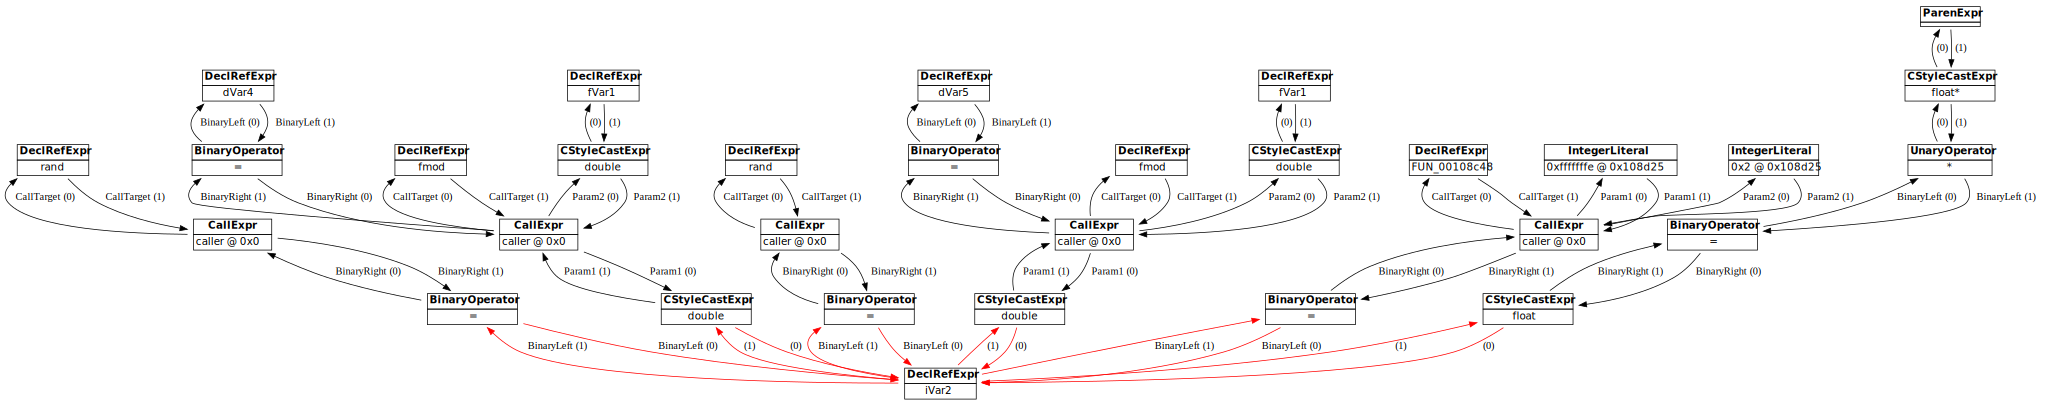

In [6]:
VariableGraphViewer('iVar2', ast, max_hops=5).render_vargraph()